In [ ]:
from google.colab import files
uploaded = files.upload()

Saving NIFTY 100.csv to NIFTY 100.csv


In [ ]:
import pandas as pd

df = pd.read_csv("NIFTY 100.csv")
df.head()

,Date,Open,High,Low,Close,Volume,Turnover,P/E,P/B,Div Yield
0,2003-01-01,0.0,0.0,0.0,1000.00,NaN,NaN,14.04,2.14,2.73
1,2003-01-02,0.0,0.0,0.0,1008.03,NaN,NaN,14.15,2.16,2.71
2,2003-01-03,0.0,0.0,0.0,1004.49,NaN,NaN,14.10,2.15,2.72
3,2003-01-06,0.0,0.0,0.0,999.85,NaN,NaN,14.04,2.14,2.73
4,2003-01-07,0.0,0.0,0.0,997.81,NaN,NaN,14.01,2.14,2.74


In [ ]:
print(df.isnull().sum())

Date           0
Open           0
High           0
Low            0
Close          0
Volume       695
Turnover     695
P/E            3
P/B            3
Div Yield      3
dtype: int64


In [ ]:
df = df.dropna()  # Or use df.fillna(value) for filling

In [ ]:
print(df.describe())

               Open          High           Low         Close        Volume  \
count   3906.000000   3906.000000   3906.000000   3906.000000  3.906000e+03   
mean    7168.731605   7209.717127   7114.181772   7193.999332  3.922027e+08   
std     3252.750371   3260.199661   3236.654420   3190.948251  3.456012e+08   
min        0.000000      0.000000      0.000000   2277.760000  4.401477e+06   
25%     4853.275000   4899.275000   4805.275000   4855.062500  2.103657e+08   
50%     5981.900000   6009.300000   5944.950000   5974.075000  2.805903e+08   
75%     9702.125000   9752.275000   9644.975000   9697.737500  4.259597e+08   
max    16141.450000  16167.600000  16113.600000  16136.650000  4.113891e+09   

           Turnover          P/E          P/B    Div Yield  
count  3.906000e+03  3906.000000  3906.000000  3906.000000  
mean   1.355835e+11    22.228927     3.542286     1.298336  
std    1.078743e+11     5.284806     0.725843     0.231685  
min    1.362200e+09    10.140000     1.97000

In [ ]:
print(df.dtypes)

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume       float64
Turnover     float64
P/E          float64
P/B          float64
Div Yield    float64
dtype: object


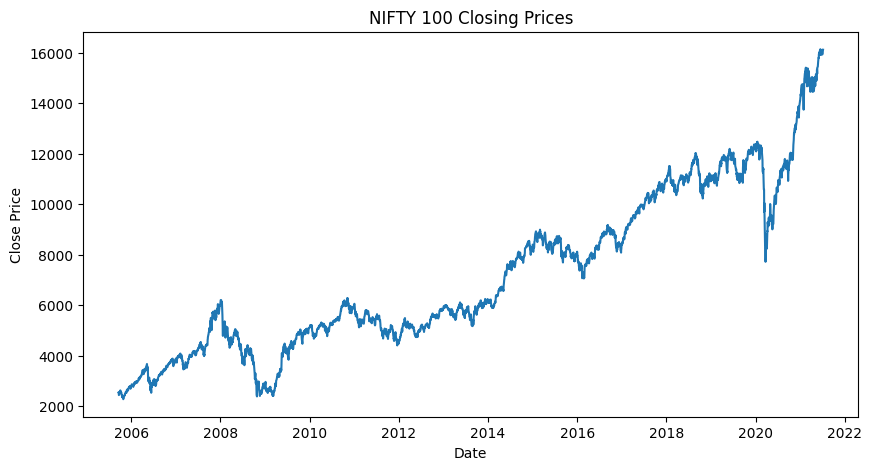

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting Closing Prices Over Time
plt.figure(figsize=(10, 5))
plt.plot(pd.to_datetime(df['Date']), df['Close'], label='Close Price')
plt.title('NIFTY 100 Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()

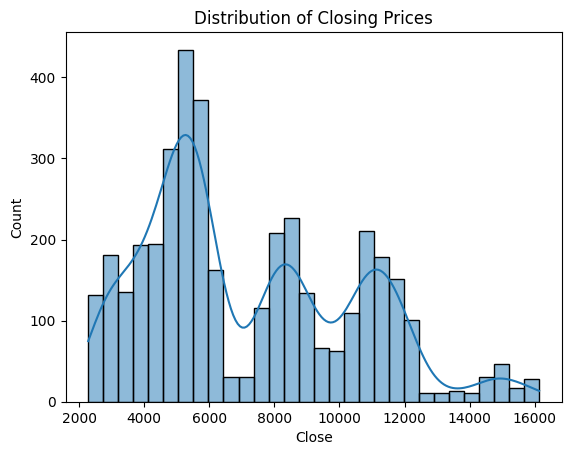

In [ ]:
sns.histplot(df['Close'], bins=30, kde=True)
plt.title('Distribution of Closing Prices')
plt.show()

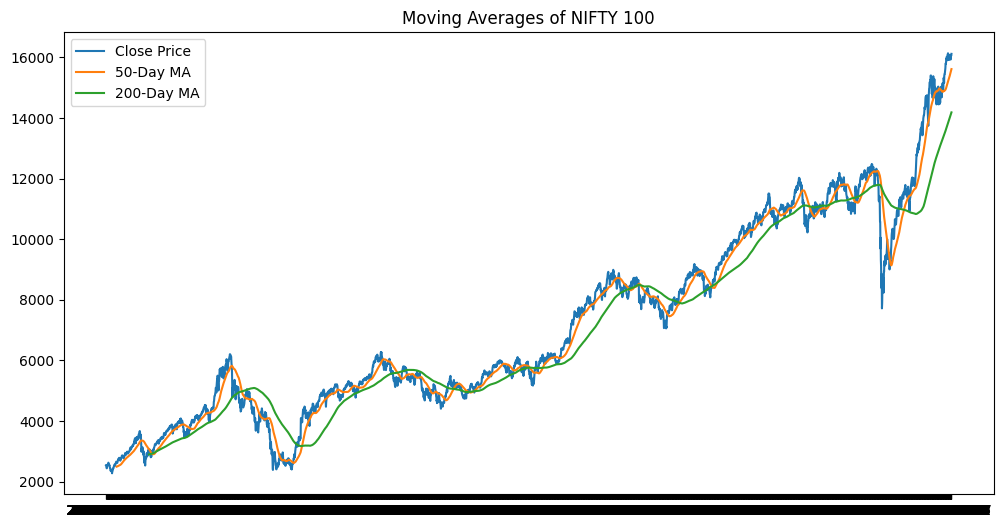

In [ ]:
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.plot(df['Date'], df['MA50'], label='50-Day MA')
plt.plot(df['Date'], df['MA200'], label='200-Day MA')
plt.title('Moving Averages of NIFTY 100')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

ValueError: could not convert string to float: '2005-09-19'

<Figure size 800x600 with 0 Axes>

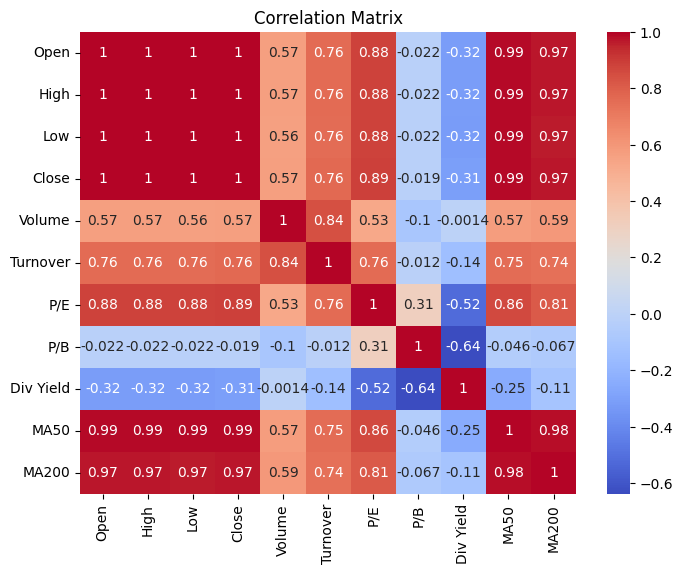

In [ ]:
# Convert the 'Date' column to datetime format (if not already)
df['Date'] = pd.to_datetime(df['Date'])

# Drop non-numeric columns before calculating the correlation matrix
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df.to_csv('cleaned_NIFTY_100.csv', index=False)
from google.colab import files
files.download('cleaned_NIFTY_100.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

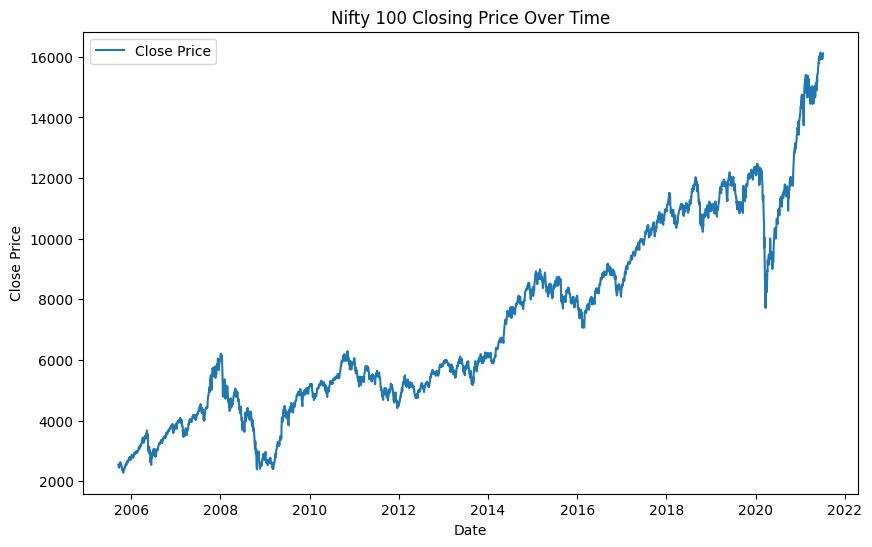

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Nifty 100 Closing Price Over Time')
plt.legend()
plt.show()

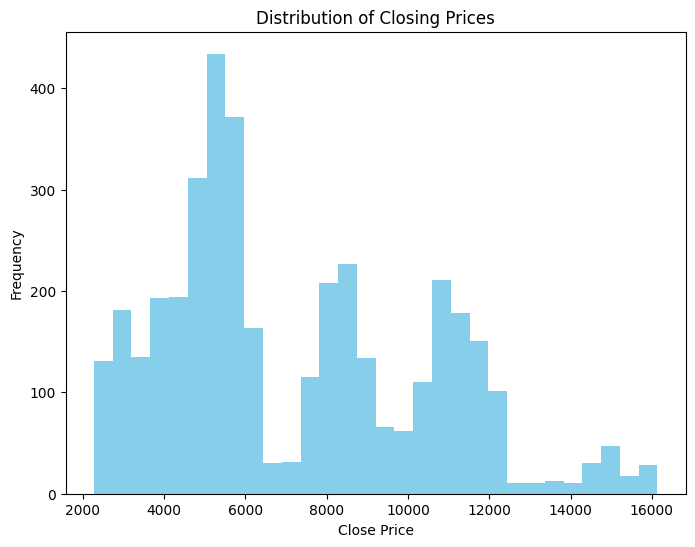

In [ ]:
plt.figure(figsize=(8, 6))
plt.hist(df['Close'], bins=30, color='skyblue')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Distribution of Closing Prices')
plt.show()


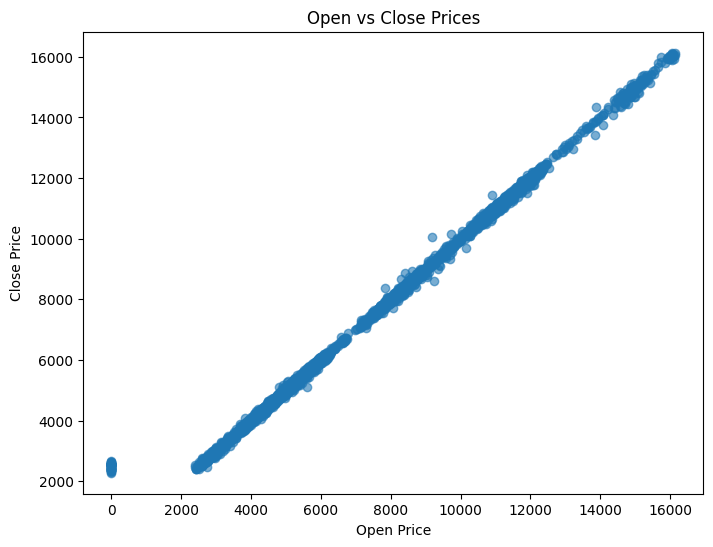

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(df['Open'], df['Close'], alpha=0.6)
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.title('Open vs Close Prices')
plt.show()

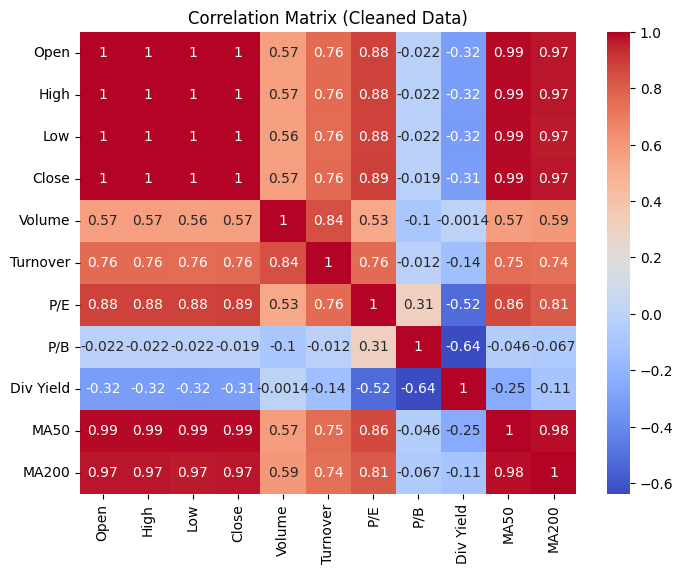

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (Cleaned Data)')
plt.show()

In [4]:
from google.colab import files
uploaded = files.upload()

# Load the file after uploading
df = pd.read_csv("cleaned_NIFTY_100.csv")


Saving cleaned_NIFTY_100.csv to cleaned_NIFTY_100 (1).csv


            Date    Close       20_MA
3901  2021-07-01  15928.1  16003.3025
3902  2021-07-02  15957.1  16003.8650
3903  2021-07-05  16066.9  16006.2800
3904  2021-07-06  16054.9  16008.1650
3905  2021-07-07  16117.4  16018.7975


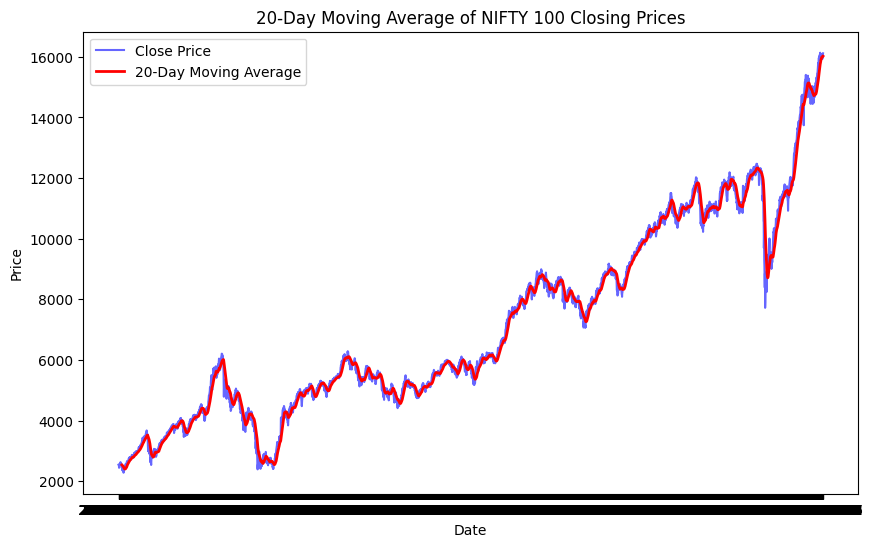

In [5]:
# Calculate the 20-day moving average of the 'Close' price
df['20_MA'] = df['Close'].rolling(window=20).mean()

# Display the last few rows to see the moving average
print(df[['Date', 'Close', '20_MA']].tail())

# Plotting the original closing prices and the moving average
plt.figure(figsize=(10, 6))
plt.plot(df['Date'], df['Close'], label='Close Price', color='blue', alpha=0.6)
plt.plot(df['Date'], df['20_MA'], label='20-Day Moving Average', color='red', linewidth=2)
plt.title('20-Day Moving Average of NIFTY 100 Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [8]:
import pandas as pd
import numpy as np

# Load the cleaned CSV file
df = pd.read_csv("cleaned_NIFTY_100.csv")

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the DataFrame by date
df = df.sort_values(by='Date')

# Calculate 50-day and 200-day moving averages
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Calculate daily price change and volatility (percentage change)
df['Price_Change'] = df['Close'].pct_change() * 100
df['Volatility'] = df['Price_Change'].rolling(window=20).std()

# Filter stocks based on key financial metrics
best_stocks = df[(df['P/E'] < 20) & (df['P/B'] < 3) & (df['Div Yield'] > 2)]

# Display the top 10 stocks sorted by dividend yield
top_dividend_stocks = best_stocks.sort_values(by='Div Yield', ascending=False).head(10)

# Display the final table
print("Top 10 Best Stocks to Buy:")
print(top_dividend_stocks[['Date', 'Close', 'P/E', 'P/B', 'Div Yield', 'MA50', 'MA200']])

Top 10 Best Stocks to Buy:
          Date    Close    P/E   P/B  Div Yield      MA50       MA200
771 2008-10-27  2388.60  10.14  1.97       2.25  3732.128  4442.14925
787 2008-11-20  2407.55  10.50  1.99       2.23  3263.068  4200.43075
858 2009-03-09  2405.00  11.28  1.97       2.21  2657.252  3430.86875
856 2009-03-05  2414.95  11.32  1.97       2.20  2673.408  3454.57325
770 2008-10-24  2456.50  10.48  2.03       2.19  3771.381  4460.79800
859 2009-03-12  2445.15  11.47  2.00       2.18  2651.083  3418.95625
857 2009-03-06  2451.30  11.49  2.00       2.17  2665.070  3442.72550
786 2008-11-19  2487.05  10.85  2.05       2.16  3297.988  4214.81800
854 2009-03-03  2461.50  11.54  2.01       2.16  2691.169  3478.59275
794 2008-12-02  2492.35  10.87  2.06       2.16  3045.018  4106.97025


<ipython-input-9-68475b8e030c>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_dividend_stocks, x='Div Yield', y='Close', palette='viridis')


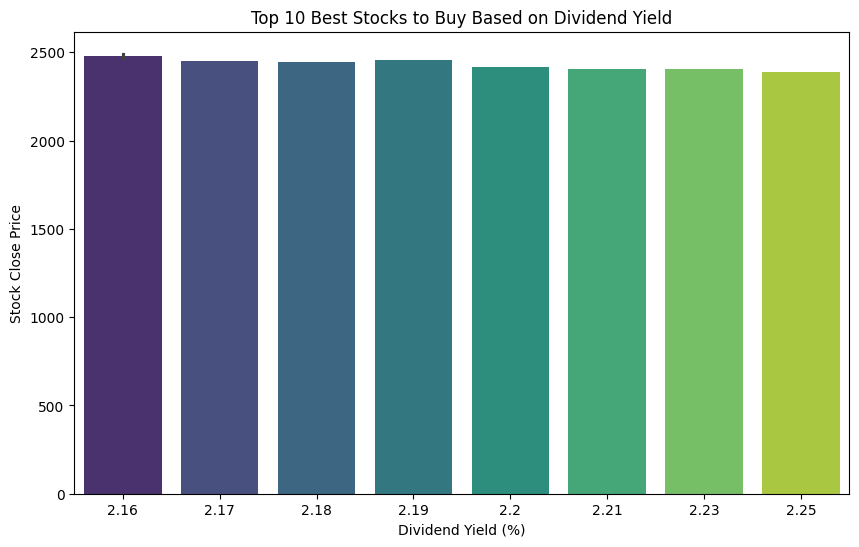

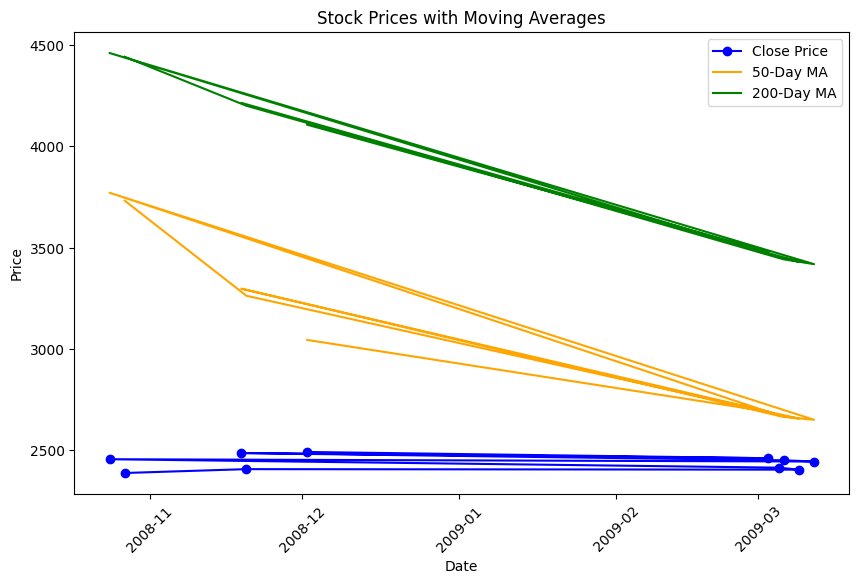

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned CSV file
df = pd.read_csv("cleaned_NIFTY_100.csv")

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sort the DataFrame by date
df = df.sort_values(by='Date')

# Calculate 50-day and 200-day moving averages
df['MA50'] = df['Close'].rolling(window=50).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

# Calculate daily price change and volatility (percentage change)
df['Price_Change'] = df['Close'].pct_change() * 100
df['Volatility'] = df['Price_Change'].rolling(window=20).std()

# Filter stocks based on key financial metrics
best_stocks = df[(df['P/E'] < 20) & (df['P/B'] < 3) & (df['Div Yield'] > 2)]

# Display the top 10 stocks sorted by dividend yield
top_dividend_stocks = best_stocks.sort_values(by='Div Yield', ascending=False).head(10)

# Plotting the top 10 best stocks based on dividend yield
plt.figure(figsize=(10, 6))
sns.barplot(data=top_dividend_stocks, x='Div Yield', y='Close', palette='viridis')
plt.title('Top 10 Best Stocks to Buy Based on Dividend Yield')
plt.xlabel('Dividend Yield (%)')
plt.ylabel('Stock Close Price')
plt.show()

# Plotting the 50-day and 200-day moving averages for the top stock
plt.figure(figsize=(10, 6))
plt.plot(top_dividend_stocks['Date'], top_dividend_stocks['Close'], label='Close Price', color='blue', marker='o')
plt.plot(top_dividend_stocks['Date'], top_dividend_stocks['MA50'], label='50-Day MA', color='orange')
plt.plot(top_dividend_stocks['Date'], top_dividend_stocks['MA200'], label='200-Day MA', color='green')
plt.title('Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.show()